# Tuberculosis (TB) Classification Model

---


# Introduction:

***Tuberculosis***, also well known as ***TB***, is an infectious disease that is usually caused by a bacterium called ***Mycobacterium Tuberculosis (MTB)***.

MTB can be spread from one person to another through tiny droplets released into the air via coughs and sneezes.

These bacteria mainly affect the lungs, but really can attack any other parts of the body, such as kidneys, spines, and brains. Thus, if not treated properly, TB can be fatal.

Lastly, there are mainly two types of TB: latent TB infection (LTBI) and Active TB disease.


*   LTBI: In this condition, you have a TB infection, but the bacteria remain in your body in an inactive state and cause no symptoms. (It isn't contagious.) It can turn into active TB, so treatment is important for the person with latent TB and to help control the spread of TB. An estimated 2 billion people have latent TB.
*   Active TB: This condition makes you sick and in most cases can spread to others. It can occur in the first few weeks after infection with the TB bacteria, or it might occur years later.

TB is indeed a potentially serious infectious disease that is now very widespread over the world. In fact, according to CDC in 2018, **1.7 billion** people were infected by TB bacteria — **roughly 23%** of the world's population. Thus, TB is the leading infectious disease killer in the world, claiming 1.5 million lives each year.






---



# Acknowledgements:

1.   Datasets can be acquired at https://www.kaggle.com/kmader/pulmonary-chest-xray-abnormalities?select=ChinaSet_AllFiles
2.   For the sake of training & analyzing, the dataset has been re-organized into train and test folders.
3.   For the simplicity, this model is ***a binary classification model*** (either normal or TB).

# Datasets

---

# China Set - The Shenzhen set - Chest X-ray Database

The standard digital image database for Tuberculosis is created by the National Library of Medicine, Maryland, USA in collaboration with Shenzhen No.3 People’s Hospital, Guangdong Medical College, Shenzhen, China. The Chest X-rays are from out-patient clinics, and were captured as part of the daily routine using Philips DR Digital Diagnose systems.
Number of X-rays:


*   336 cases with manifestation of tuberculosis, and
*   326 normal cases.




It is requested that publications resulting from the use of this data attribute the source (National Library of Medicine, National Institutes of Health, Bethesda, MD, USA and Shenzhen No.3 People’s Hospital, Guangdong Medical College, Shenzhen, China) and cite the following publications:


*   Jaeger S, Karargyris A, Candemir S, Folio L, Siegelman J, Callaghan F, Xue Z, Palaniappan K, Singh RK, Antani S, Thoma G, Wang YX, Lu PX, McDonald CJ. Automatic tuberculosis screening using chest radiographs. IEEE Trans Med Imaging. 2014 Feb;33(2):233-45. doi: 10.1109/TMI.2013.2284099. PMID: 24108713
*   Candemir S, Jaeger S, Palaniappan K, Musco JP, Singh RK, Xue Z, Karargyris A, Antani S, Thoma G, McDonald CJ. Lung segmentation in chest radiographs using anatomical atlases with nonrigid registration. IEEE Trans Med Imaging. 2014 Feb;33(2):577-90. doi: 10.1109/TMI.2013.2290491. PMID: 24239990





# Visualizing the Data

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/TB_Classification/ChinaSet_AllFiles'

In [3]:
# confirm if the drive is properly mounted
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

In [5]:
# confirming if there are 'TB' and 'normal' folders under test_path
os.listdir(test_path)

['normal', 'TB']

In [6]:
# confirming if there are 'TB' and 'normal' folders under train_path
os.listdir(train_path)

['normal', 'TB']

In [7]:
# Let's see how the x-ray picture looks like
os.listdir(train_path+'/TB')[0]

'CHNCXR_0328_1.png'

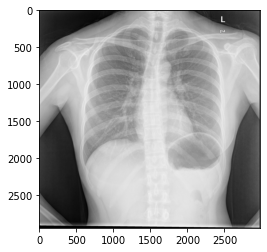

In [8]:
# one of the x-ray pictures of a patient with TB (in other words, infected)
TB_xray_img = imread(train_path+'/TB'+'/CHNCXR_0328_1.png')
plt.imshow(TB_xray_img)

In [9]:
TB_xray_img.shape

(2939, 2985, 3)

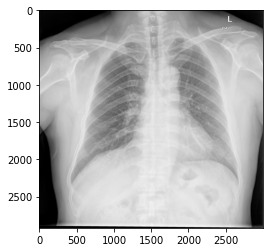

In [10]:
# Let's also have a look at the normal x-ray picture, or the x-ray picture of uninfected lungs 
normal_xray_img = imread(train_path+'/normal/'+os.listdir(train_path+'normal')[0])
plt.imshow(normal_xray_img)

**Check the number of images:**



> After running the following lines of code:

*   **"Normal" train** data : 294
*   **"TB" train** data : 303
*   **"Normal" test** data : 32
*   **"TB" test** data : 33









In [11]:
len(os.listdir(train_path+'/normal'))

294

In [12]:
len(os.listdir(train_path+'/TB'))

303

In [13]:
len(os.listdir(test_path+'/normal'))

32

In [14]:
len(os.listdir(test_path+'/TB'))

33

**Find out the average dimensions of the images**

In [15]:
TB_xray_img.shape

(2939, 2985, 3)

In [16]:
normal_xray_img.shape

(2919, 3000, 3)

In [17]:
# as shown above, there are 3 dimensions; however, the last dimension is just the number of colour channels (3).
dim1 = []
dim2 = []

for image_filename in os.listdir(train_path+'normal'):
    
    path = train_path+'normal/'+image_filename
    img = imread(path)
    d1,d2,colours = img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


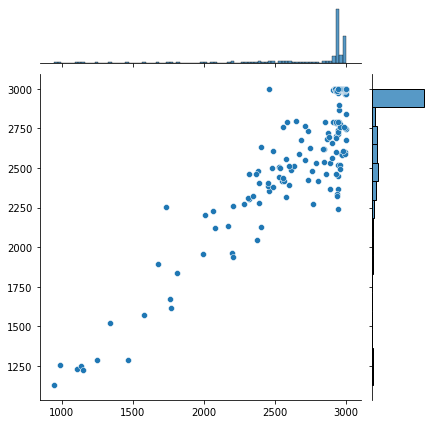

In [18]:
sns.jointplot(dim1,dim2)

In [19]:
np.mean(dim1)

2792.690476190476

In [20]:
np.mean(dim2)

2761.8809523809523

# Resizing the Image Files

---
As obtained from the original images, the input image shape should be approximately (2793, 2762, 3).

However, it is too large to train; thus, it needs to be resized.


---
After resizing to (400, 393, 3), the performance of the model was not as great as I wanted it to be.

Hence, I will reduce the toal parameters in the network by resizing to (200, 193, 3).

---
Once again, resized to (224, 224, 3) for better performance of the model.



In [21]:
import PIL
from PIL import Image

In [22]:
# "TB" test
for image_filename in os.listdir(test_path+'TB'):
    
    path = test_path+'TB/'+image_filename
    img = Image.open(path)
    img = img.resize((224, 224))
    img.save(path)

In [23]:
# "normal" test
for image_filename in os.listdir(test_path+'normal'):
    
    path = test_path+'normal/'+image_filename
    img = Image.open(path)
    img = img.resize((224, 224))
    img.save(path)

In [24]:
# "TB" train
for image_filename in os.listdir(train_path+'TB'):
    
    path = train_path+'TB/'+image_filename
    img = Image.open(path)
    img = img.resize((224, 224))
    img.save(path)

In [25]:
# "normal" train
for image_filename in os.listdir(train_path+'normal'):
    
    path = train_path+'normal/'+image_filename
    img = Image.open(path)
    img = img.resize((224, 224))
    img.save(path)

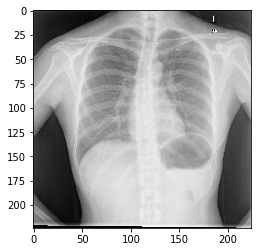

In [26]:
TB_xray_img = imread(train_path+'/TB'+'/CHNCXR_0328_1.png')
plt.imshow(TB_xray_img)

In [27]:
TB_xray_img.shape

(224, 224, 3)

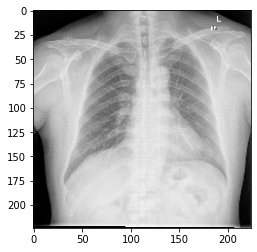

In [28]:
normal_xray_img = imread(train_path+'/normal/'+os.listdir(train_path+'normal')[0])
plt.imshow(normal_xray_img)

In [29]:
normal_xray_img.shape

(224, 224, 3)

In [30]:
# Thus, the new input image shape is:
image_shape = (224, 224, 3)

# Data Preprocessing for the Model

---
***Image Manipulation***

Images are manipulated by rotating, resizing, and scaling in order to make the model become more robust to different images that are not contained in the dataset. 



In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

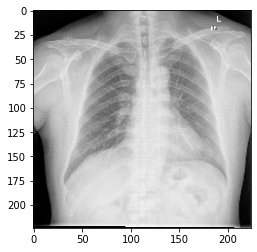

In [33]:
# Let's compare the difference between the original image and the manipulated image

plt.imshow(normal_xray_img) # original "normal" x-ray image

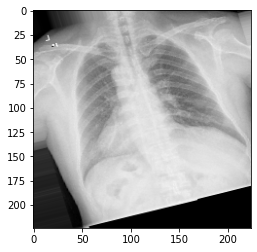

In [34]:
plt.imshow(image_gen.random_transform(normal_xray_img)) # manipulated "normal" x-ray image

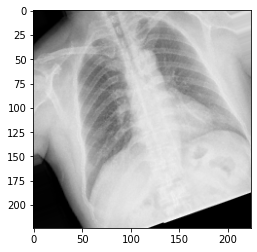

In [35]:
plt.imshow(image_gen.random_transform(normal_xray_img)) # twice-manipulated "normal" x-ray image

In [36]:
image_gen.flow_from_directory(train_path)

Found 597 images belonging to 2 classes.


In [37]:
image_gen.flow_from_directory(test_path)

Found 65 images belonging to 2 classes.


# Creating the Model

---
Once again, this model is a binary classification model that classifies an input image as either "normal" or "TB". The whole objective is to diagnose TB from x-ray pictures.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [39]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


# use Dropout to reduce overfitting by randomly turning off 50% of neurons
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))

# for the last layer, use sigmoid activation function since it is a binary classfication
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

# Early Stopping

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
# let's have a patience of 1, just for in case
# can fix this parameter at any time
early_stop = EarlyStopping(monitor='val_loss',patience=1)

# Training the Model

In [65]:
batch_size = 16

In [66]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 597 images belonging to 2 classes.


In [67]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)
# shuffling, which is True by default, should be False for generating the test set, unlike the train set. 

Found 65 images belonging to 2 classes.


In [68]:
# checking the class indices for the train set
train_image_gen.class_indices

{'TB': 0, 'normal': 1}

In [69]:
# checking the class indices for the test set
test_image_gen.class_indices

{'TB': 0, 'normal': 1}

In [70]:
# just to ignore any popping warnings while training the model
import warnings
warnings.filterwarnings('ignore')

In [71]:
results = model.fit_generator(train_image_gen,epochs=75,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/75
38/38 [==============================] - 8s 220ms/step - loss: 0.4435 - accuracy: 0.8023 - val_loss: 0.4719 - val_accuracy: 0.8462
Epoch 2/75
38/38 [==============================] - 8s 213ms/step - loss: 0.4312 - accuracy: 0.8007 - val_loss: 0.4018 - val_accuracy: 0.8615
Epoch 3/75
38/38 [==============================] - 8s 214ms/step - loss: 0.4250 - accuracy: 0.8157 - val_loss: 0.4375 - val_accuracy: 0.8154


In [72]:
# save the model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/TB_Classification/tuberculosis_diagnosis_model.h5')

# Evaluating the Model

In [73]:
losses = pd.DataFrame(model.history.history)

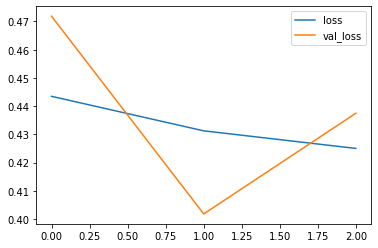

In [74]:
losses[['loss','val_loss']].plot()

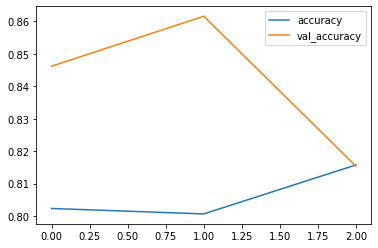

In [85]:
losses[['accuracy', 'val_accuracy']].plot()

In [75]:
model.evaluate_generator(test_image_gen)

[0.41443732380867004, 0.8307692408561707]

In [76]:
from tensorflow.keras.preprocessing import image

In [77]:
pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities #probability of prediction correct

array([[0.00871561],
       [0.11116324],
       [0.74813753],
       [0.22450772],
       [0.32267416],
       [0.47260007],
       [0.61533326],
       [0.73500186],
       [0.00472436],
       [0.4196878 ],
       [0.7610127 ],
       [0.00644646],
       [0.03468003],
       [0.04629888],
       [0.56501603],
       [0.10111616],
       [0.3748425 ],
       [0.22932692],
       [0.5849928 ],
       [0.8557851 ],
       [0.07549134],
       [0.2578785 ],
       [0.2474542 ],
       [0.02104258],
       [0.02310037],
       [0.6244745 ],
       [0.23581038],
       [0.01481361],
       [0.0148207 ],
       [0.31681824],
       [0.02498843],
       [0.24611436],
       [0.01024675],
       [0.69496125],
       [0.3348403 ],
       [0.790738  ],
       [0.770627  ],
       [0.5515973 ],
       [0.8168901 ],
       [0.8032916 ],
       [0.6855236 ],
       [0.8092176 ],
       [0.65016526],
       [0.6310576 ],
       [0.9287575 ],
       [0.8584509 ],
       [0.82218546],
       [0.615

In [78]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [79]:
# if the prediction probability is greater than 0.5, or 50%, return True
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [80]:
len(predictions)

65

In [81]:
correct_cnt = np.count_nonzero(predictions)
correct_cnt

38

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.79      0.94      0.86        32

    accuracy                           0.85        65
   macro avg       0.86      0.85      0.85        65
weighted avg       0.86      0.85      0.85        65



In [95]:
cf_matrix = confusion_matrix(test_image_gen.classes,predictions)
cf_matrix

array([[25,  8],
       [ 2, 30]])

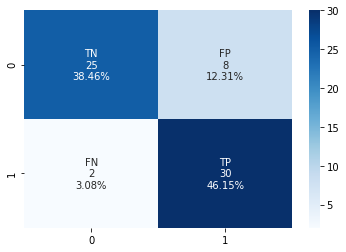

In [102]:
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)] # up to 2 decimal points

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')



---

***Evaluation Summary***



*   *True Positive (TP)*: The model predicted yes (infected TB), and the patients really do have TB.
*   *True Negative (TN)*: The model predicted no (normal), and the patients don't have TB.
*   *False Positive (FP)*: The model predicted yes (infected TB), but the patients don't actually have TB.
*   *False Negative (FN)*: The model predicted no (normal), but the patients actually do have TB.


From the above confusion matrix,
*   TP : 30
*   TN : 25
*   FP : 8
*   FN : 2

The model can be evaluated to perform very well because there are more of false positives (FP) than false negatives (FN). In other words, it is better to predict to have TB even though the patient may not really have it. Additionally, the model had **a fairly high accuracy of 85%**, further proving its superb performance.



# Predicting on an Image

In [114]:
# let demo_img be a normal x-ray picture
demo_img = image.load_img(train_path+'/normal'+'/CHNCXR_0011_0.png', target_size=image_shape)

In [115]:
demo_img
type(demo_img) # note that demo_img is in PIL.Image.Image type; thus, need to be converted into a numpy array

PIL.Image.Image

In [116]:
demo_img = image.img_to_array(demo_img)

In [117]:
type(demo_img)

numpy.ndarray

In [118]:
demo_img.shape

(224, 224, 3)

In [119]:
# Inputting only one image for the demo; thus, need to be reshaped accordingly
demo_img = np.expand_dims(demo_img, axis=0) # need to be reshaped to (1, 224, 224, 3)

In [120]:
demo_img.shape

(1, 224, 224, 3)

In [121]:
train_image_gen.class_indices

{'TB': 0, 'normal': 1}

In [122]:
model.predict(demo_img) # successfully predicted to be normal (1)

array([[1.]], dtype=float32)